In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from scipy.stats import norm

# Aggregate results across all networks

In [2]:
nets = [
    'friedrichshain-center',
    'berlin-mitte-center',
    'berlin-mitte-prenzlauerberg-friedrichshain-center',
    'berlin-prenzlauerberg-center',
    'berlin-tiergarten',
    'SiouxFalls'
]

df = pd.DataFrame(columns=['net', 'mean', 'sd', 'tstt', 'wvc', 'vmt', 'costs_rmse', 'cost_err25', 'cost_err75', 'flows_rmse', 'flow_err25', 'flow_err75'])
for net in nets:
    # read 0 SD trials
    dft = pd.read_csv(f'output/data/{net}_trials_means_only.csv')
    dft['net'] = net
    dft['sd'] = 0.0
    df = df.append(dft, ignore_index=True, sort=False)
    
    # read variable SD trials
    dft = pd.read_csv(f'output/data/{net}_trials.csv')
    dft['net'] = net
    df = df.append(dft, ignore_index=True, sort=False)
df.loc[df['net']=='berlin-mitte-prenzlauerberg-friedrichshain-center','net'] = 'bmpfc'
nets[2] = 'bmpfc'
df.sample(10)

,net,mean,sd,tstt,wvc,vmt,costs_rmse,cost_err25,cost_err75,flows_rmse,flow_err25,flow_err75
159,friedrichshain-center,1.0,0.500,7.265680e+05,0.457995,1.723705e+07,0.425308,-3.565000e-04,3.510000e-04,53.603236,-16.447255,13.078757
10832,SiouxFalls,1.0,0.001,7.479308e+06,1.473962,3.418976e+06,0.004413,-2.068000e-03,4.462500e-04,3.783068,-1.432877,0.757699
5529,berlin-prenzlauerberg-center,1.0,0.001,1.399862e+06,0.430578,2.896959e+07,0.000694,-4.000000e-06,1.000000e-06,0.084753,-0.052444,0.019100
8110,SiouxFalls,1.0,0.200,7.765108e+06,1.484358,3.481516e+06,1.166177,-2.560140e-01,5.580735e-01,636.153594,-161.413190,433.823943
1008,friedrichshain-center,1.0,0.010,7.282254e+05,0.473145,1.730154e+07,0.004241,-3.000000e-06,1.050000e-05,0.919008,-0.214723,0.210487
5579,berlin-prenzlauerberg-center,1.0,0.001,1.399989e+06,0.430615,2.897182e+07,0.000993,-1.000000e-06,4.000000e-06,0.119736,-0.034864,0.055626
11237,SiouxFalls,1.0,0.001,7.479396e+06,1.473980,3.419014e+06,0.004449,-2.771000e-03,3.570000e-04,2.810595,-1.538646,0.937008
10395,SiouxFalls,1.0,0.005,7.483259e+06,1.474172,3.420307e+06,0.023578,-9.325750e-03,9.904000e-03,21.662715,-5.817831,9.530961
1106,friedrichshain-center,1.0,0.010,7.286761e+05,0.473392,1.730634e+07,0.002535,-7.000000e-06,9.500000e-06,0.945552,-0.405574,0.210028
650,friedrichshain-center,1.0,0.050,7.273352e+05,0.473767,1.724891e+07,0.019879,-3.900000e-05,4.850000e-05,5.910799,-2.001352,0.879345


In [3]:
summary = df.groupby(['net', 'mean', 'sd'])
summary.count()

tstt  wvc  vmt  costs_rmse  cost_err25  \
net                   mean sd                                              
SiouxFalls            0.00 0.000     1    1    1           1           1   
                      0.25 0.000     1    1    1           1           1   
                      0.50 0.000     1    1    1           1           1   
                      0.75 0.000     1    1    1           1           1   
                      1.00 0.000     1    1    1           1           1   
                           0.001   500  500  500         500         500   
                           0.005   500  500  500         500         500   
                           0.010   500  500  500         500         500   
                           0.020   500  500  500         500         500   
                           0.050   500  500  500         500         500   
                           0.100   500  500  500         500         500   
                           0.200   500  500  500         500         500   
                           0.500   500  500  500         500         500   
                      1.25 0.000     1    1    1           1           1   
                      1.50 0.000     1    1    1           1           1   
                      1.75 0.000     1    1    1           1           1   
berlin-mitte-center   0.00 0.000     1    1    1           1           1   
                      0.25 0.000     1    1    1           1           1   
                      0.50 0.000     1    1    1           1           1   
                      0.75 0.000     1    1    1           1           1   
                      1.00 0.000     1    1    1           1           1   
                           0.001   200  200  200         200         200   
                           0.005   200  200  200         200         200   
                           0.010   200  200  200         200         200   
                           0.020   200  200  200         200         200   
                           0.050   200  200  200         200         200   
                           0.100   200  200  200         200         200   
                           0.200   200  200  200         200         200   
                           0.500   200  200  200         200         200   
                      1.25 0.000     1    1    1           1           1   
...                                ...  ...  ...         ...         ...   
bmpfc                 0.50 0.000     1    1    1           1           1   
                      0.75 0.000     1    1    1           1           1   
                      1.00 0.000     1    1    1           1           1   
                           0.001   100  100  100         100         100   
                           0.005   100  100  100         100         100   
                           0.010   100  100  100         100         100   
                           0.020   100  100  100         100         100   
                           0.050   100  100  100         100         100   
                           0.100   100  100  100         100         100   
                           0.200   100  100  100         100         100   
                           0.500   100  100  100         100         100   
                      1.25 0.000     1    1    1           1           1   
                      1.50 0.000     1    1    1           1           1   
                      1.75 0.000     1    1    1           1           1   
friedrichshain-center 0.00 0.000     1    1    1           1           1   
                      0.25 0.000     1    1    1           1           1   
                      0.50 0.000     1    1    1           1           1   
                      0.75 0.000     1    1    1           1           1   
                      1.00 0.000     1    1    1           1           1   
                           0.001   200  200  200         200         200   
      

In [4]:
df_summary = summary.describe()
df_summary.head()

tstt                                                \
                    count          mean std           min           25%   
net        mean sd                                                        
SiouxFalls 0.00 0.0   1.0  0.000000e+00 NaN  0.000000e+00  0.000000e+00   
           0.25 0.0   1.0  8.277958e+05 NaN  8.277958e+05  8.277958e+05   
           0.50 0.0   1.0  1.870592e+06 NaN  1.870592e+06  1.870592e+06   
           0.75 0.0   1.0  3.654464e+06 NaN  3.654464e+06  3.654464e+06   
           1.00 0.0   1.0  7.480171e+06 NaN  7.480171e+06  7.480171e+06   

                                                                wvc            \
                              50%           75%           max count      mean   
net        mean sd                                                              
SiouxFalls 0.00 0.0  0.000000e+00  0.000000e+00  0.000000e+00   1.0  0.000000   
           0.25 0.0  8.277958e+05  8.277958e+05  8.277958e+05   1.0  0.514646   
           0.50 0.0  1.870592e+06  1.870592e+06  1.870592e+06   1.0  0.829003   
           0.75 0.0  3.654464e+06  3.654464e+06  3.654464e+06   1.0  1.145810   
           1.00 0.0  7.480171e+06  7.480171e+06  7.480171e+06   1.0  1.474030   

                     ...    flow_err25               flow_err75               \
                     ...           75%           max      count         mean   
net        mean sd   ...                                                       
SiouxFalls 0.00 0.0  ... -15292.871544 -15292.871544        1.0 -8382.829875   
           0.25 0.0  ... -11911.621544 -11911.621544        1.0 -5650.000000   
           0.50 0.0  ...  -8262.457785  -8262.457785        1.0 -3475.187360   
           0.75 0.0  ...  -3942.319025  -3942.319025        1.0 -1768.643446   
           1.00 0.0  ...      0.000000      0.000000        1.0     0.000000   

                                                                             \
                    std          min          25%          50%          75%   
net        mean sd                                                            
SiouxFalls 0.00 0.0 NaN -8382.829875 -8382.829875 -8382.829875 -8382.829875   
           0.25 0.0 NaN -5650.000000 -5650.000000 -5650.000000 -5650.000000   
           0.50 0.0 NaN -3475.187360 -3475.187360 -3475.187360 -3475.187360   
           0.75 0.0 NaN -1768.643446 -1768.643446 -1768.643446 -1768.643446   
           1.00 0.0 NaN     0.000000     0.000000     0.000000     0.000000   

                                  
                             max  
net        mean sd                
SiouxFalls 0.00 0.0 -8382.829875  
           0.25 0.0 -5650.000000  
           0.50 0.0 -3475.187360  
           0.75 0.0 -1768.643446  
           1.00 0.0     0.000000  

[5 rows x 72 columns]

In [5]:
df_trel = df.copy()
to_change = ['tstt', 'wvc', 'vmt']
for net in nets:
    true_row_values = df_trel.loc[(df_trel['net'] == net) & (df_trel['mean'] == 1) & (df_trel['sd'] == 0), to_change]
    df_trel.loc[(df_trel['net'] == net), to_change] /= true_row_values.squeeze()
df_trel.sample(10)

,net,mean,sd,tstt,wvc,vmt,costs_rmse,cost_err25,cost_err75,flows_rmse,flow_err25,flow_err75
6803,berlin-tiergarten,1.0,0.010,1.001287,1.001257,1.001044,0.006264,0.000000,0.000002,0.888839,0.000000,0.304860
5001,berlin-prenzlauerberg-center,1.0,0.020,0.999416,0.999376,0.999836,0.011646,-0.000047,0.000009,1.755156,-0.593764,0.481607
8176,SiouxFalls,1.0,0.200,1.041705,1.009526,1.021219,0.678484,-0.005501,0.454417,680.192357,-9.051711,425.436518
8988,SiouxFalls,1.0,0.050,0.996501,0.999074,1.000513,0.177938,-0.082509,0.063924,122.814783,-60.336929,80.179289
7270,SiouxFalls,1.0,0.500,1.111435,1.023558,1.044981,2.367249,-0.297515,1.300617,1489.505010,-259.736099,1336.163241
2714,berlin-mitte-center,1.0,0.010,1.000503,1.000221,1.000414,0.003665,-0.000002,0.000005,0.499661,-0.120872,0.176074
5990,berlin-tiergarten,1.0,0.200,0.975427,0.974275,0.980545,0.051261,-0.000011,0.000000,18.267463,-6.388354,0.851997
3949,bmpfc,1.0,0.001,0.999987,0.999998,0.999993,0.000111,0.000000,0.000000,0.041966,-0.016530,0.011005
6586,berlin-tiergarten,1.0,0.020,0.998057,0.997852,0.998362,0.004303,-0.000002,0.000000,1.837549,-0.576753,0.032543
1847,berlin-mitte-center,1.0,0.200,0.994081,0.991223,0.999643,0.159554,-0.000093,0.000059,16.508111,-3.557148,5.568953


In [6]:
summary_trel = df_trel.groupby(['net', 'mean', 'sd'])
df_summary_trel = summary_trel.describe()
df_summary_trel.head()

tstt                                              \
                    count      mean std       min       25%       50%   
net        mean sd                                                      
SiouxFalls 0.00 0.0   1.0  0.000000 NaN  0.000000  0.000000  0.000000   
           0.25 0.0   1.0  0.110665 NaN  0.110665  0.110665  0.110665   
           0.50 0.0   1.0  0.250073 NaN  0.250073  0.250073  0.250073   
           0.75 0.0   1.0  0.488553 NaN  0.488553  0.488553  0.488553   
           1.00 0.0   1.0  1.000000 NaN  1.000000  1.000000  1.000000   

                                          wvc            ...    flow_err25  \
                          75%       max count      mean  ...           75%   
net        mean sd                                       ...                 
SiouxFalls 0.00 0.0  0.000000  0.000000   1.0  0.000000  ... -15292.871544   
           0.25 0.0  0.110665  0.110665   1.0  0.349142  ... -11911.621544   
           0.50 0.0  0.250073  0.250073   1.0  0.562406  ...  -8262.457785   
           0.75 0.0  0.488553  0.488553   1.0  0.777331  ...  -3942.319025   
           1.00 0.0  1.000000  1.000000   1.0  1.000000  ...      0.000000   

                                  flow_err75                                \
                              max      count         mean std          min   
net        mean sd                                                           
SiouxFalls 0.00 0.0 -15292.871544        1.0 -8382.829875 NaN -8382.829875   
           0.25 0.0 -11911.621544        1.0 -5650.000000 NaN -5650.000000   
           0.50 0.0  -8262.457785        1.0 -3475.187360 NaN -3475.187360   
           0.75 0.0  -3942.319025        1.0 -1768.643446 NaN -1768.643446   
           1.00 0.0      0.000000        1.0     0.000000 NaN     0.000000   

                                                                         
                             25%          50%          75%          max  
net        mean sd                                                       
SiouxFalls 0.00 0.0 -8382.829875 -8382.829875 -8382.829875 -8382.829875  
           0.25 0.0 -5650.000000 -5650.000000 -5650.000000 -5650.000000  
           0.50 0.0 -3475.187360 -3475.187360 -3475.187360 -3475.187360  
           0.75 0.0 -1768.643446 -1768.643446 -1768.643446 -1768.643446  
           1.00 0.0     0.000000     0.000000     0.000000     0.000000  

[5 rows x 72 columns]

## Plot summary

In [7]:
df_sum4plot = df_summary.reset_index()
df_sum4plot.head()

net  mean   sd  tstt                                                \
                         count          mean std           min           25%   
0  SiouxFalls  0.00  0.0   1.0  0.000000e+00 NaN  0.000000e+00  0.000000e+00   
1  SiouxFalls  0.25  0.0   1.0  8.277958e+05 NaN  8.277958e+05  8.277958e+05   
2  SiouxFalls  0.50  0.0   1.0  1.870592e+06 NaN  1.870592e+06  1.870592e+06   
3  SiouxFalls  0.75  0.0   1.0  3.654464e+06 NaN  3.654464e+06  3.654464e+06   
4  SiouxFalls  1.00  0.0   1.0  7.480171e+06 NaN  7.480171e+06  7.480171e+06   

                               ...    flow_err25               flow_err75  \
            50%           75%  ...           75%           max      count   
0  0.000000e+00  0.000000e+00  ... -15292.871544 -15292.871544        1.0   
1  8.277958e+05  8.277958e+05  ... -11911.621544 -11911.621544        1.0   
2  1.870592e+06  1.870592e+06  ...  -8262.457785  -8262.457785        1.0   
3  3.654464e+06  3.654464e+06  ...  -3942.319025  -3942.319025        1.0   
4  7.480171e+06  7.480171e+06  ...      0.000000      0.000000        1.0   

                                                                        \
          mean std          min          25%          50%          75%   
0 -8382.829875 NaN -8382.829875 -8382.829875 -8382.829875 -8382.829875   
1 -5650.000000 NaN -5650.000000 -5650.000000 -5650.000000 -5650.000000   
2 -3475.187360 NaN -3475.187360 -3475.187360 -3475.187360 -3475.187360   
3 -1768.643446 NaN -1768.643446 -1768.643446 -1768.643446 -1768.643446   
4     0.000000 NaN     0.000000     0.000000     0.000000     0.000000   

                
           max  
0 -8382.829875  
1 -5650.000000  
2 -3475.187360  
3 -1768.643446  
4     0.000000  

[5 rows x 75 columns]

In [8]:
df_trel_sum4plot = df_summary_trel.reset_index()
df_trel_sum4plot.head()

net  mean   sd  tstt                                              \
                         count      mean std       min       25%       50%   
0  SiouxFalls  0.00  0.0   1.0  0.000000 NaN  0.000000  0.000000  0.000000   
1  SiouxFalls  0.25  0.0   1.0  0.110665 NaN  0.110665  0.110665  0.110665   
2  SiouxFalls  0.50  0.0   1.0  0.250073 NaN  0.250073  0.250073  0.250073   
3  SiouxFalls  0.75  0.0   1.0  0.488553 NaN  0.488553  0.488553  0.488553   
4  SiouxFalls  1.00  0.0   1.0  1.000000 NaN  1.000000  1.000000  1.000000   

             ...    flow_err25               flow_err75                   \
        75%  ...           75%           max      count         mean std   
0  0.000000  ... -15292.871544 -15292.871544        1.0 -8382.829875 NaN   
1  0.110665  ... -11911.621544 -11911.621544        1.0 -5650.000000 NaN   
2  0.250073  ...  -8262.457785  -8262.457785        1.0 -3475.187360 NaN   
3  0.488553  ...  -3942.319025  -3942.319025        1.0 -1768.643446 NaN   
4  1.000000  ...      0.000000      0.000000        1.0     0.000000 NaN   

                                                                    
           min          25%          50%          75%          max  
0 -8382.829875 -8382.829875 -8382.829875 -8382.829875 -8382.829875  
1 -5650.000000 -5650.000000 -5650.000000 -5650.000000 -5650.000000  
2 -3475.187360 -3475.187360 -3475.187360 -3475.187360 -3475.187360  
3 -1768.643446 -1768.643446 -1768.643446 -1768.643446 -1768.643446  
4     0.000000     0.000000     0.000000     0.000000     0.000000  

[5 rows x 75 columns]

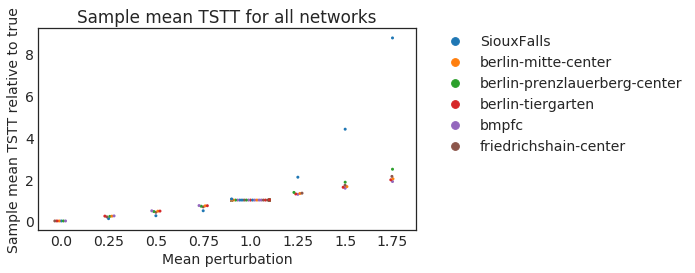

In [9]:
plt.rcParams.update({'font.size': 14})

def plot_metric_dist_over_networks(metric, which, rel=False):
    plt.figure(figsize=(10,4))
    sns.swarmplot('mean', (metric.lower(), which), 'net', data=(df_trel_sum4plot if rel else df_sum4plot), size=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(f'Sample {which} {metric}' + (' relative to true' if rel else ''))
    plt.xlabel('Mean perturbation')
    plt.title(f'Sample {which} {metric} for all networks')
    plt.tight_layout()
    relstring = '_rel' if rel else ''
    plt.savefig(f'output/plots/all_{metric.lower()}_sample_{which}{relstring}.png', dpi='figure')
    plt.show()

plot_metric_dist_over_networks('TSTT', 'mean', rel=True)

# All 1-mean trial plotting

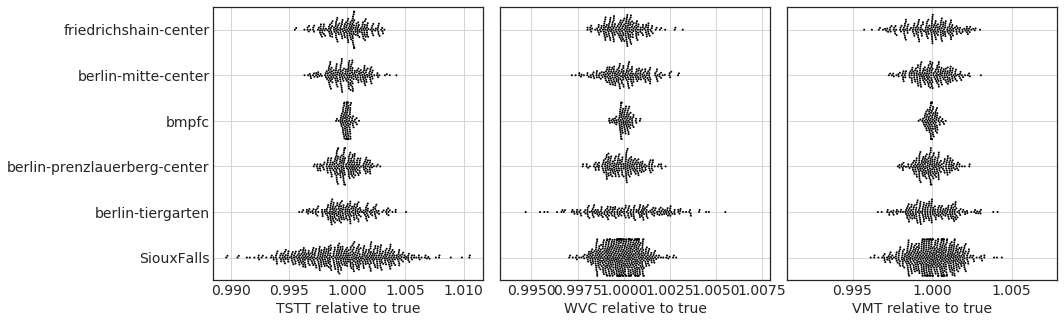

In [10]:
plt.rcParams.update({'font.size': 14})
def plot_trial_outputs(sd=0.02):
    fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    for i,col in enumerate(['tstt', 'wvc', 'vmt']):
        sns.swarmplot(x=col, y="net", data=df_trel[(df_trel['mean']==1) & (df_trel['sd']==sd)], size=2, ax=axes[i], color='k')
        axes[i].set_ylabel('')
        axes[i].set_xlabel(f'{col.upper()} relative to true')
        axes[i].grid()
#     fig.suptitle(f'{sd} OD demand standard deviation vs. output metrics for all trials')
    plt.tight_layout()
    plt.subplots_adjust(top=.9)
    plt.savefig(f'output/trialoutputs_sd{sd}.png', dpi='figure')
    plt.show()

plot_trial_outputs()

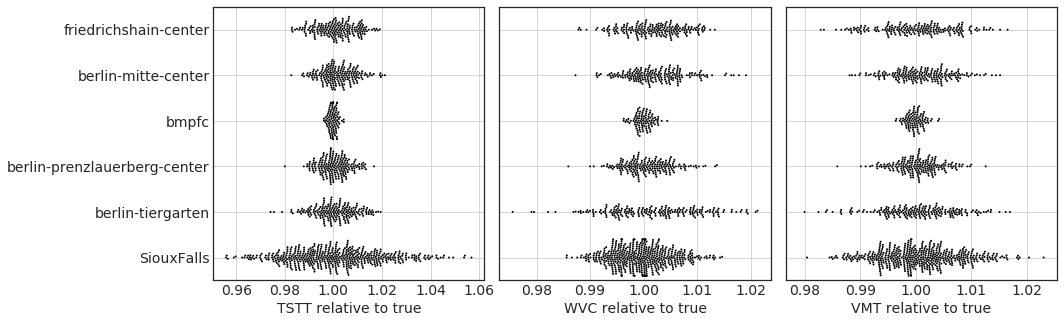

In [11]:
plot_trial_outputs(0.1)

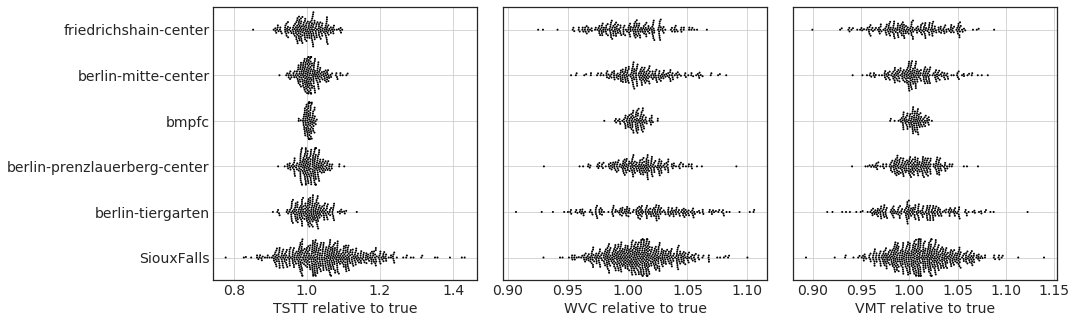

In [12]:
plot_trial_outputs(0.5)

# Format DataFrames for $\LaTeX$

In [13]:
df1 = df.loc[df['mean']==1,['net', 'sd', 'tstt', 'wvc', 'vmt', 
                            'costs_rmse', 'cost_err25', 'cost_err75', 'flows_rmse', 'flow_err25', 'flow_err75']]
df1 = df1.reset_index(drop=True)
df1.sample(10)

,net,sd,tstt,wvc,vmt,costs_rmse,cost_err25,cost_err75,flows_rmse,flow_err25,flow_err75
10749,SiouxFalls,0.001,7.481684e+06,1.474094,3.419449e+06,0.004286,-0.000206,0.002600,2.724160,-0.344420,2.409290
1949,berlin-mitte-center,0.200,1.086957e+06,0.342367,2.219613e+07,0.324182,-0.000003,0.000346,21.309184,-0.806715,6.868747
5140,berlin-prenzlauerberg-center,0.010,1.400370e+06,0.430611,2.897538e+07,0.008165,-0.000006,0.000026,1.183220,-0.171380,0.424600
2595,berlin-mitte-center,0.020,1.048486e+06,0.332959,2.174088e+07,0.019844,-0.000065,0.000000,2.289330,-1.157196,0.044911
2156,berlin-mitte-center,0.100,1.049891e+06,0.333985,2.173717e+07,0.061774,-0.000012,0.000062,5.806977,-1.640766,1.969993
3791,bmpfc,0.010,2.362585e+06,0.286013,5.714658e+07,0.001261,-0.000001,0.000008,0.399864,-0.132313,0.175877
8779,SiouxFalls,0.050,7.530126e+06,1.475656,3.430952e+06,0.256450,-0.051175,0.089435,161.665487,-55.615254,83.656966
6658,berlin-tiergarten,0.010,7.168373e+05,0.312802,1.680434e+07,0.003133,0.000000,0.000000,0.954992,-0.154354,0.105830
3789,bmpfc,0.010,2.362511e+06,0.286024,5.714403e+07,0.001929,-0.000003,0.000003,0.409370,-0.136217,0.117990
1392,friedrichshain-center,0.005,7.291223e+05,0.473484,1.731831e+07,0.001675,0.000000,0.000036,0.472610,0.000000,0.382608


In [14]:
df1_summary = df1.groupby(['net', 'sd']).describe()
df1_summary.head()

tstt                                            \
                  count          mean           std           min   
net        sd                                                       
SiouxFalls 0.000    1.0  7.480171e+06           NaN  7.480171e+06   
           0.001  500.0  7.480052e+06   1328.816366  7.475725e+06   
           0.005  500.0  7.479971e+06   6667.739101  7.452037e+06   
           0.010  500.0  7.480355e+06  13235.637989  7.439085e+06   
           0.020  500.0  7.478847e+06  26331.054793  7.402409e+06   

                                                                          \
                           25%           50%           75%           max   
net        sd                                                              
SiouxFalls 0.000  7.480171e+06  7.480171e+06  7.480171e+06  7.480171e+06   
           0.001  7.479168e+06  7.480045e+06  7.480926e+06  7.483772e+06   
           0.005  7.475269e+06  7.480063e+06  7.484658e+06  7.503655e+06   
           0.010  7.470915e+06  7.480686e+06  7.489097e+06  7.519239e+06   
           0.020  7.460178e+06  7.479238e+06  7.498127e+06  7.559030e+06   

                    wvc            ... flow_err25           flow_err75  \
                  count      mean  ...        75%       max      count   
net        sd                      ...                                   
SiouxFalls 0.000    1.0  1.474030  ...   0.000000  0.000000        1.0   
           0.001  500.0  1.474024  ...  -0.924985  0.254655      500.0   
           0.005  500.0  1.474010  ...  -4.480589  2.295333      500.0   
           0.010  500.0  1.474018  ...  -8.384356  1.958450      500.0   
           0.020  500.0  1.473865  ... -18.928806  3.040440      500.0   

                                                                         \
                       mean        std        min        25%        50%   
net        sd                                                             
SiouxFalls 0.000   0.000000        NaN   0.000000   0.000000   0.000000   
           0.001   1.350761   0.754754  -0.388172   0.820333   1.274382   
           0.005   7.060995   3.895448  -4.355011   4.308474   6.780579   
           0.010  14.710551   7.466770  -3.360790   9.594757  14.703125   
           0.020  29.282322  15.522379 -14.165706  17.800987  29.296271   

                                        
                        75%        max  
net        sd                           
SiouxFalls 0.000   0.000000   0.000000  
           0.001   1.814122   3.811896  
           0.005   9.656296  18.568253  
           0.010  19.280073  42.479815  
           0.020  40.117881  91.534860  

[5 rows x 72 columns]

In [15]:
df1_summary.to_latex(f'output/latex/summary.tex',
                     columns=[p for p in df1_summary.columns.values if (
                         (
                             p[1] not in {'count', 'min', '25%', '50%', '75%', 'max'}
                         ) and (
                             p[0] not in {'cost_err25', 'cost_err75', 'flow_err25', 'flow_err75'}
                         )
                     )],
                     formatters = {
                         ('tstt', 'mean'): '{:.3e}'.format,
                         ('tstt', 'std'): '{:.3e}'.format,
                         ('wvc', 'mean'): "{0:.3f}".format,
                         ('wvc', 'std'): "{0:.3f}".format,
                         ('vmt', 'mean'): '{:.3e}'.format,
                         ('vmt', 'std'): '{:.3e}'.format,
                         ('costs_rmse', 'mean'): '{:.3e}'.format,
                         ('costs_rmse', 'std'): '{:.3e}'.format,
#                          ('cost_err25', 'mean'): '{:.3e}'.format,
#                          ('cost_err25', 'std'): '{:.3e}'.format,
#                          ('cost_err75', 'mean'): '{:.3e}'.format,
#                          ('cost_err75', 'std'): '{:.3e}'.format,
                         ('flows_rmse', 'mean'): '{:.3e}'.format,
                         ('flows_rmse', 'std'): '{:.3e}'.format,
#                          ('flow_err25', 'mean'): '{:.3e}'.format,
#                          ('flow_err25', 'std'): '{:.3e}'.format,
#                          ('flow_err75', 'mean'): '{:.3e}'.format,
#                          ('flow_err75', 'std'): '{:.3e}'.format
                     },
                     multicolumn=True, multirow=True, longtable=False)

# Parallel Comparison

In [16]:
def means_to_normal_areas(means, nmean, nsd):
    means.sort()
    dist = norm(nmean, nsd)
    weights = [None]*len(means)
    for i,mean in enumerate(means):
        lower = -np.inf if i==0 else means[i-1]+(means[i]-means[i-1])/2
        upper = np.inf if i==len(means)-1 else means[i]+(means[i+1]-means[i])/2
        weights[i] = dist.cdf(upper) - dist.cdf(lower)
    return weights

def compute_parallels(net, net_in_filename, p):
    metrics = ['tstt', 'wvc', 'vmt', 'costs_rmse', 'cost_err25', 'cost_err75', 'flows_rmse', 'flow_err25', 'flow_err75']
    metrics_normalizable = ['tstt', 'wvc', 'vmt']
    sigmas = df['sd'].unique().tolist()
    sigmas.sort()
    df_res = pd.DataFrame(index=pd.MultiIndex(levels=[[],[]],
                             codes=[[],[]],
                             names=['sigma', 'method']),
                          columns=metrics)
    
    for sigma in sigmas[1:]: # skip sigma=0

        # uniform perturbation
        df_up = df_trel[(df_trel['net'] == net) & (df_trel['sd']==0)]
        up_weights = means_to_normal_areas(df_up['mean'].unique().tolist(), 1, sigma)
        df_res.loc[(sigma, 'uniform'),] = df_up[metrics].apply(lambda c: (c*up_weights).sum())
        
        # od-specific perturbation
        df_op = df_trel[(df_trel['net'] == net) & (df_trel['mean']==1) & (df_trel['sd']==sigma)]
        df_res.loc[(sigma, 'od-specific'),:] = df_summary_trel.loc[(net, 1, sigma),[(metric,'mean') for metric in metrics]].values
        
        # spatially-correlated perturbation
        df_pp = pd.read_csv(f'output/data/{net_in_filename}_trials_partial_perturb.csv')
        df_pp = df_pp[(df_pp['method']=='By origin') & (df_pp['p']==p)]
        df_pp.drop(['method', 'p'], axis=1, inplace=True)
        df_pp[metrics_normalizable] /= df.loc[(df['net'] == net) & (df['mean']==1) & (df['sd']==0), metrics_normalizable].values
        df_pp = df_pp.append({
            'mean': 1,
            'tstt': 1,
            'wvc': 1,
            'vmt': 1,
            'costs_rmse': 0,
            'cost_err25': 0,
            'cost_err75': 0,
            'flows_rmse': 0,
            'flow_err25': 0,
            'flow_err75': 0
        }, ignore_index=True)
        df_pp.sort_values('mean', inplace=True)
        pp_weights = means_to_normal_areas(df_pp['mean'].tolist(), 1, sigma/p)
        df_res.loc[(sigma, 'spatial'),] = df_pp[metrics].apply(lambda c: (c*pp_weights).sum())
    
    df_res.to_csv(f'output/data/{net_in_filename}_parallel.csv')
    return df_res

parallels = {}
for net in nets:
    parallels[net] = compute_parallels(net=net, net_in_filename=(
        net if net is not 'bmpfc' else 'berlin-mitte-prenzlauerberg-friedrichshain-center'
    ), p=0.25)
parallels['bmpfc']

tstt       wvc       vmt     costs_rmse     cost_err25  \
sigma method                                                                    
0.001 uniform      1.000000  1.000000  1.000000   0.000000e+00   0.000000e+00   
      od-specific  1.000000  1.000002  1.000000   1.466678e-04  -2.975000e-07   
      spatial      1.000000  1.000000  1.000000  4.492002e-216 -1.328624e-217   
0.005 uniform      1.000000  1.000000  1.000000  7.519274e-139 -3.598343e-140   
      od-specific  0.999989  0.999989  0.999992   7.011562e-04  -1.932500e-06   
      spatial      1.000000  1.000000  1.000000   1.996484e-11  -2.442707e-13   
0.010 uniform      1.000000  1.000000  1.000000   9.181864e-37  -4.393975e-38   
      od-specific  1.000011  1.000018  1.000010   1.393574e-03  -3.245000e-06   
      spatial      1.000001  1.000003  1.000000   8.648622e-05  -1.058162e-06   
0.020 uniform      1.000000  1.000000  1.000000   1.104289e-10  -2.415925e-12   
      od-specific  0.999981  1.000020  0.999982   2.684176e-03  -7.120000e-06   
      spatial      1.000065  1.000224  0.999997   5.748089e-03  -7.032722e-05   
0.050 uniform      1.000083  0.999944  1.000000   3.341318e-03  -7.310018e-05   
      od-specific  0.999973  0.999956  0.999978   6.770576e-03  -1.707000e-05   
      spatial      1.000362  1.001314  0.999991   2.953974e-02  -3.418790e-04   
0.100 uniform      1.001411  0.999051  0.999997   5.689358e-02  -1.244235e-03   
      od-specific  0.999846  0.999986  0.999833   1.412813e-02  -3.307250e-05   
      spatial      1.000815  1.003180  1.000007   5.771249e-02  -5.940940e-04   
0.200 uniform      1.004887  0.996108  0.999937   1.590940e-01  -3.314182e-03   
      od-specific  0.999804  1.000196  0.999818   2.825479e-02  -7.398250e-05   
      spatial      1.001216  1.004869  1.000027   8.113060e-02  -7.871592e-04   
0.500 uniform      1.012997  0.963211  0.989474   3.840748e-01  -6.351080e-03   
      od-specific  1.005234  1.006710  1.004521   6.835180e-02  -9.956500e-05   
      spatial      1.001500  1.006074  1.000041   9.752500e-02  -9.195945e-04   

                     cost_err75     flows_rmse     flow_err25     flow_err75  
sigma method                                                                  
0.001 uniform      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  
      od-specific  3.875000e-07   3.984485e-02  -1.357283e-02   1.419052e-02  
      spatial      0.000000e+00  3.295935e-213 -2.166026e-213   0.000000e+00  
0.005 uniform      0.000000e+00  2.672035e-136 -2.891512e-136 -1.482517e-137  
      od-specific  1.700000e-06   1.970050e-01  -7.301015e-02   6.793717e-02  
      spatial      2.815706e-13   1.221744e-08  -3.982289e-09   3.922338e-09  
0.010 uniform      0.000000e+00   3.262850e-34  -3.530856e-34  -1.810317e-35  
      od-specific  3.665000e-06   3.959655e-01  -1.393173e-01   1.390598e-01  
      spatial      1.219743e-06   5.292506e-02  -1.725098e-02   1.699127e-02  
0.020 uniform      5.491653e-12   3.655522e-08  -1.859877e-08   1.793694e-08  
      od-specific  6.572500e-06   7.792112e-01  -2.786411e-01   2.789411e-01  
      spatial      8.106751e-05   3.517509e+00  -1.146535e+00   1.129279e+00  
0.050 uniform      1.661644e-04   1.106075e+00  -5.627550e-01   5.427294e-01  
      od-specific  1.689750e-05   1.947856e+00  -7.025064e-01   6.759352e-01  
      spatial      4.246990e-04   1.759479e+01  -5.719495e+00   5.723919e+00  
0.100 uniform      2.831201e-03   1.883392e+01  -9.582574e+00   9.241446e+00  
      od-specific  3.263250e-05   3.883883e+00  -1.416221e+00   1.347453e+00  
      spatial      8.603176e-04   3.255392e+01  -1.052187e+01   1.088244e+01  
0.200 uniform      8.602043e-03   5.283512e+01  -2.692782e+01   2.592671e+01  
      od-specific  6.645000e-05   7.691917e+00  -2.849102e+00   2.718692e+00  
      spatial      1.229285e-03   4.457938e+01  -1.436724e+01   1.510288e+01  
0.500 uniform      2.944710e-02   1.328704e+02  -6.948601e+01   6.313742e+01  
      od-specific  2

In [17]:
parallels['SiouxFalls']

tstt       wvc       vmt     costs_rmse     cost_err25  \
sigma method                                                                    
0.001 uniform      1.000000  1.000000  1.000000   0.000000e+00   0.000000e+00   
      od-specific  0.999984  0.999996  0.999993   4.527014e-03  -1.612759e-03   
      spatial      1.000000  1.000000  1.000000  2.506020e-214 -2.882165e-214   
0.005 uniform      1.000000  1.000000  1.000000  1.191407e-137 -1.486498e-137   
      od-specific  0.999973  0.999986  0.999999   2.307181e-02  -7.969041e-03   
      spatial      1.000000  1.000000  1.000000   1.181229e-09  -5.130590e-10   
0.010 uniform      1.000000  1.000000  1.000000   1.454839e-35  -1.815179e-35   
      od-specific  1.000025  0.999992  1.000059   4.630291e-02  -1.541171e-02   
      spatial      1.000129  1.000005  1.000007   5.116996e-03  -2.222534e-03   
0.020 uniform      1.000000  1.000000  1.000000   2.413285e-09  -7.590266e-10   
      od-specific  0.999823  0.999888  1.000061   9.309633e-02  -3.375813e-02   
      spatial      1.008569  1.000323  1.000475   3.400871e-01  -1.477131e-01   
0.050 uniform      1.003627  0.999949  1.000116   7.302031e-02  -2.296636e-02   
      od-specific  1.000014  0.999752  1.000385   2.349438e-01  -8.067622e-02   
      spatial      1.052644  1.002277  1.002623   1.722952e+00  -7.136395e-01   
0.100 uniform      1.061892  0.999133  1.001981   1.243785e+00  -3.906131e-01   
      od-specific  1.000918  0.999570  1.000782   4.835962e-01  -1.615089e-01   
      spatial      1.135394  1.006770  1.005805   3.272527e+00  -1.222403e+00   
0.200 uniform      1.221739  0.998302  1.005702   3.642845e+00  -9.350561e-01   
      od-specific  1.003641  0.999167  1.001212   9.209205e-01  -3.197129e-01   
      spatial      1.211486  1.011026  1.008603   4.539554e+00  -1.606708e+00   
0.500 uniform      2.143637  0.988738  1.006279   1.101748e+01  -7.210978e-01   
      od-specific  1.053952  1.009137  1.012905   2.105843e+00  -5.595320e-01   
      spatial      1.265957  1.014091  1.010587   5.423111e+00  -1.869410e+00   

                      cost_err75     flows_rmse     flow_err25     flow_err75  
sigma method                                                                   
0.001 uniform       0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  
      od-specific   1.425117e-03   3.090349e+00  -1.488966e+00   1.350761e+00  
      spatial     -2.854854e-216   0.000000e+00 -1.883252e-211 -4.731311e-212  
0.005 uniform     -2.380675e-138  1.039032e-134 -1.205047e-134 -5.406207e-135  
      od-specific   7.384252e-03   1.561637e+01  -7.313843e+00   7.060995e+00  
      spatial       6.622782e-10   0.000000e+00  -2.561315e-07   2.697227e-07  
0.010 uniform      -2.907067e-36   1.268773e-32  -1.471496e-32  -6.601575e-33  
      od-specific   1.501355e-02   3.058220e+01  -1.395527e+01   1.471055e+01  
      spatial       2.868940e-03   0.000000e+00  -1.109543e+00   1.168418e+00  
0.020 uniform       1.816724e-09   1.485409e-06  -4.499215e-07   6.601317e-07  
      od-specific   2.926473e-02   6.132611e+01  -2.967423e+01   2.928232e+01  
      spatial       1.906796e-01   0.000000e+00  -7.374190e+01   7.765552e+01  
0.050 uniform       5.496976e-02   4.494498e+01  -1.361357e+01   1.997402e+01  
      od-specific   7.461138e-02   1.501757e+02  -7.109309e+01   7.564710e+01  
      spatial       1.039932e+00   0.000000e+00  -3.553695e+02   3.884458e+02  
0.100 uniform       9.368042e-01   7.652607e+02  -2.318095e+02   3.400148e+02  
      od-specific   1.552084e-01   2.956346e+02  -1.425474e+02   1.544471e+02  
      spatial       2.258598e+00   0.000000e+00  -6.051129e+02   7.187360e+02  
0.200 uniform       2.917651e+00   2.129231e+03  -6.505843e+02   9.198030e+02  
      od-specific   3.011052e-01   5.729854e+02  -2.831589e+02   2.953365e+02  
      spatial       3.322544e+00   0.000000e+00  -7.926791e+02   9.842603e+02  
0.500 uniform       1.066772e+01   5.159242e+03  -1.698119e+03   1.864358e+0

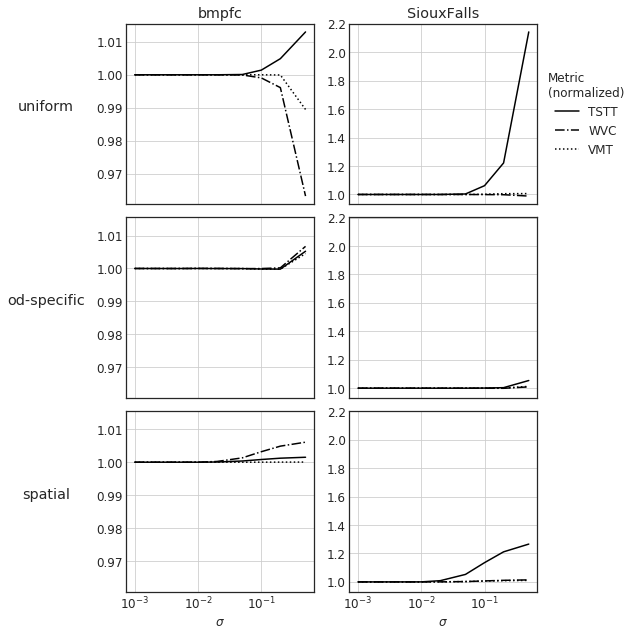

In [18]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey='col', figsize=(9,9))

ls = ['-', '-.', ':']

sigmas = parallels['bmpfc'].index.get_level_values('sigma').unique()
methods = parallels['bmpfc'].index.get_level_values('method').unique()

axes[0][0].set_title('bmpfc')
axes[0][1].set_title('SiouxFalls')
for i,method in enumerate(methods):
    for j,netw in enumerate(['bmpfc', 'SiouxFalls']):
        for k,metric in enumerate(['tstt', 'wvc', 'vmt']):
            axes[i,j].plot(sigmas, parallels[netw].xs(method, level='method')[metric].values, c='k', linestyle=ls[k], label=metric.upper())
            axes[i,j].set_xscale('log')
            axes[i,j].grid()
            if i==2:
                axes[i,j].set_xlabel('$\sigma$')
    axes[i][0].set_ylabel(method, rotation=0, size='large', labelpad=50)
axes[0][1].legend(title='Metric\n(normalized)', loc='center left', bbox_to_anchor=(1,0.5))
# fig.suptitle('Metrics relative to true values for fixed input errors')
plt.tight_layout()
# fig.subplots_adjust(top=0.9)
plt.savefig('output/plots/parallel_bmpfc_sf.png', dpi='figure')
plt.show()